In [61]:
import matplotlib.pyplot as plt
import numpy as np
import diagnostics as diag
import numpy.ma as ma
from iosubdomains import Variable

In [117]:
exp = diag.plume('../../data/Nyles/plume_nonrot/', 'plume_nonrot')
rot = diag.plume('../../data/Nyles/plume_rot/', 'plume_rot')
time = exp.time/3600/24
r_lim = 0.35
z_lim = 0.6

In [63]:
variables = exp.read_vars(['x', 'y', 'z'])

x = variables['x']
y = variables['y']
z = variables['z']

XZ, ZX = np.meshgrid(x/exp.params['Lx']-0.5, z/exp.params['Lz'])
XY, YX = np.meshgrid(x/exp.params['Lx']-0.5, y/exp.params['Ly']-0.5)

In [67]:
r = np.sqrt(XY**2 + YX**2)

In [103]:
z[10]/Lz

0.328125

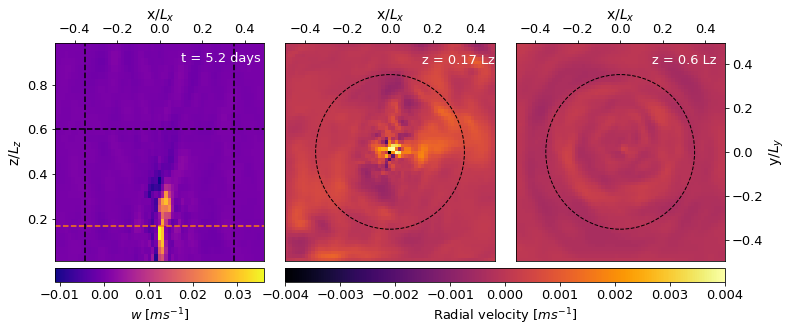

In [123]:
n = 250
zi = 5

u = Variable(exp.template, 'u')
u = diag.velocity_interpolation(u[n,zi,:,:], axis=1)/exp.params['Lx']
v = Variable(exp.template, 'u')
v = diag.velocity_interpolation(v[n,zi,:,:], axis=0)/exp.params['Ly']

radial_speed = (u*XY + v*YX)/r

maxx = 4e-3
minn = -4e-3
Lz = 2000
nz = exp.params['nz']
new_nz = int(nz*z_lim)

plt.rcParams.update({'font.size': 13})
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, 
                             gridspec_kw = {'width_ratios':[1, 1, 1], 'wspace': 0.1})
fig.set_size_inches(12,4)

im1 = ax1.pcolormesh(XZ, ZX, w[n, :, 32, :]/exp.params['Lz'], cmap='plasma',)
                     #vmin=minn, vmax=maxx)
ax1.axhline(z_lim, c='k',linestyle='--')
ax1.axhline(z[zi]/Lz, c='tab:orange',linestyle='--')

ax1.axvline(r_lim, c='k', linestyle='--')
ax1.axvline(-r_lim, c='k', linestyle='--')
ax1.set_xlabel('x/$L_x$', fontsize=14)
ax1.set_ylabel('z/$L_z$', fontsize=14)
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.text(0.1, 0.9, f't = {time[n]:0.1f} days', color='w')

im2 = ax2.pcolormesh(XY, YX, radial_speed[:, :], cmap='inferno', vmin=minn, vmax=maxx)
draw_circle = plt.Circle((0., 0.), r_lim, fill=False, linestyle='--', color='k')
ax2.add_artist(draw_circle)
#ax2.yaxis.set_label_position("right")
ax2.yaxis.set_ticks_position('none') 
ax2.set_yticks([])
ax2.set_xlabel('x/$L_x$', fontsize=14) #'$\mathscr{P}$'
#ax2.set_ylabel('y/$L_y$', fontsize=14)
ax2.xaxis.set_label_position('top')
ax2.xaxis.tick_top()
ax2.text(0.15, 0.4, f'z = {z[zi]/Lz:0.2f} Lz', color='w')

zi = 19
u = Variable(exp.template, 'u')
v = Variable(exp.template, 'v')
u = diag.velocity_interpolation(u[n,zi,:,:], axis=1)/exp.params['Lx']
v = diag.velocity_interpolation(v[n,zi,:,:], axis=0)/exp.params['Ly']
radial_speed = (u*XY + v*YX)/r

ax3.pcolormesh(XY, YX, radial_speed[:, :], cmap='inferno', vmin=minn, vmax=maxx)
draw_circle = plt.Circle((0., 0.), r_lim, fill=False, linestyle='--')
ax3.add_artist(draw_circle)
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")
ax3.set_xlabel('x/$L_x$', fontsize=14) #'$\mathscr{P}$'
ax3.set_ylabel('y/$L_y$', fontsize=14)
ax3.xaxis.set_label_position('top')
ax3.xaxis.tick_top()
ax3.text(0.15, 0.4, f'z = {0.6:0.1f} Lz', color='w')

p0 = ax1.get_position().get_points().flatten()
p2 = ax2.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.05, p0[2] - p0[0], 0.05])
ax_cbar_2 = fig.add_axes([p2[0], 0.05, p2[2] - p2[1], 0.05])
cbar = plt.colorbar(im1, cax=ax_cbar, orientation='horizontal')
cbar_2 = plt.colorbar(im2, cax=ax_cbar_2, orientation='horizontal')
cbar.set_label('$w$ [$m s^{-1}$]')
cbar_2.set_label('Radial velocity [$m s^{-1}$]')
#plt.tight_layout(True)
plt.savefig('../../stage_M2/LES/figs/steady_snapshot', facecolor=(1,0,0,0), bbox_inches='tight', dpi=120)

In [64]:
w = Variable(exp.template, 'w')
b = Variable(exp.template, 'b')


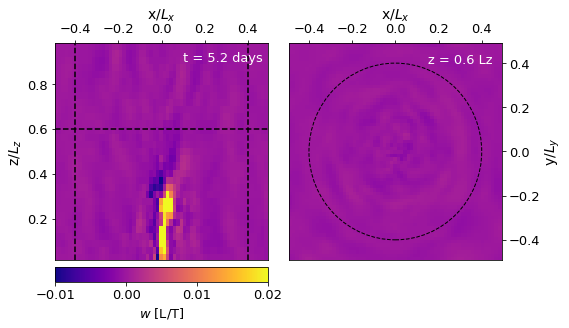

In [66]:
n = 250
maxx = 2e-2
minn = -1e-2
Lz = 2000
nz = exp.params['nz']
new_nz = int(nz*z_lim)

plt.rcParams.update({'font.size': 13})
fig, (ax1, ax2) = plt.subplots(ncols=2, 
                             gridspec_kw = {'width_ratios':[1, 1], 'wspace': 0.1})
fig.set_size_inches(8,4)

im1 = ax1.pcolormesh(XZ, ZX, w[n, :, 32, :]/exp.params['Lz'], cmap='plasma',
                     vmin=minn, vmax=maxx)
ax1.axhline(z_lim, c='k',linestyle='--')
ax1.axvline(r_lim, c='k', linestyle='--')
ax1.axvline(-r_lim, c='k', linestyle='--')
ax1.set_xlabel('x/$L_x$', fontsize=14)
ax1.set_ylabel('z/$L_z$', fontsize=14)
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.text(0.1, 0.9, f't = {time[n]:0.1f} days', color='w')

ax2.pcolormesh(XY, YX, w[n, new_nz, :, :]/exp.params['Lz'], cmap='plasma', vmin=minn, vmax=maxx)
draw_circle = plt.Circle((0., 0.), r_lim, fill=False, linestyle='--')
ax2.add_artist(draw_circle)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_xlabel('x/$L_x$', fontsize=14) #'$\mathscr{P}$'
ax2.set_ylabel('y/$L_y$', fontsize=14)
ax2.xaxis.set_label_position('top')
ax2.xaxis.tick_top()
ax2.text(0.15, 0.4, f'z = {0.6:0.1f} Lz', color='w')

p0 = ax1.get_position().get_points().flatten()
p2 = ax2.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.05, p0[2] - p0[0], 0.05])
#ax_cbar = fig.add_axes([p0[0], 0.05, p2[2] - p2[1], 0.05])
cbar = plt.colorbar(im1, cax=ax_cbar, orientation='horizontal')
cbar.set_label('$w$ [L/T]')
#plt.tight_layout(True)
plt.savefig('../../stage_M2/LES/figs/w_snapshot', facecolor=(1,0,0,0), bbox_inches='tight', dpi=120)

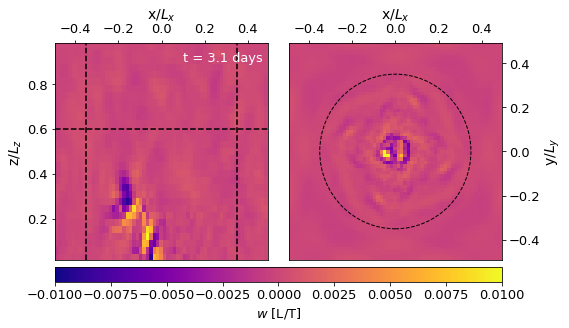

In [50]:
w_rot = Variable(rot.template, 'w')

n = 150
maxx = 1e-2
minn = -1e-2
Lz = 2000
nz = exp.params['nz']
new_nz = int(nz*z_lim)

plt.rcParams.update({'font.size': 13})
fig, (ax1, ax2) = plt.subplots(ncols=2, 
                             gridspec_kw = {'width_ratios':[1, 1], 'wspace': 0.1})
fig.set_size_inches(8,4)

im1 = ax1.pcolormesh(XZ, ZX, w_rot[n, :, 32, :]/exp.params['Lz'], cmap='plasma',
                     vmin=minn, vmax=maxx)
ax1.axhline(z_lim, c='k',linestyle='--')
ax1.axvline(r_lim, c='k', linestyle='--')
ax1.axvline(-r_lim, c='k', linestyle='--')
ax1.set_xlabel('x/$L_x$', fontsize=14)
ax1.set_ylabel('z/$L_z$', fontsize=14)
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.text(0.1, 0.9, f't = {time[n]:0.1f} days', color='w')

ax2.pcolormesh(XY, YX, w_rot[new_nz, 8, :, :]/exp.params['Lz'], cmap='plasma', vmin=minn, vmax=maxx)
draw_circle = plt.Circle((0., 0.), r_lim, fill=False, linestyle='--')
ax2.add_artist(draw_circle)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_xlabel('x/$L_x$', fontsize=14) #'$\mathscr{P}$'
ax2.set_ylabel('y/$L_y$', fontsize=14)
ax2.xaxis.set_label_position('top')
ax2.xaxis.tick_top()

p0 = ax1.get_position().get_points().flatten()
p2 = ax2.get_position().get_points().flatten()
# ax_cbar = fig.add_axes([p0[0], 0.05, p0[2] - p0[0], 0.05])
ax_cbar = fig.add_axes([p0[0], 0.05, p2[2] - p2[1], 0.05])
cbar = plt.colorbar(im1, cax=ax_cbar, orientation='horizontal')
cbar.set_label('$w$ [L/T]')
#plt.tight_layout(True)
plt.savefig('../../stage_M2/LES/figs/w_rot_snapshot', facecolor=(1,0,0,0), bbox_inches='tight', dpi=120)

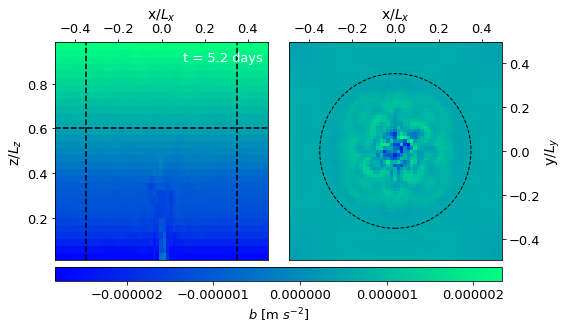

In [36]:
n = 250
maxx = 2e-2
minn = -1e-2
Lz = 2000
nz = exp.params['nz']
new_nz = int(nz*z_lim)

plt.rcParams.update({'font.size': 13})
fig, (ax1, ax2) = plt.subplots(ncols=2, 
                             gridspec_kw = {'width_ratios':[1, 1], 'wspace': 0.1})
fig.set_size_inches(8,4)

im1 = ax1.pcolormesh(XZ, ZX, b[n, :, 32, :]/exp.params['Lz'], cmap='winter',)
                     #vmin=minn, vmax=maxx)
ax1.axhline(z_lim, c='k',linestyle='--')
ax1.axvline(r_lim, c='k', linestyle='--')
ax1.axvline(-r_lim, c='k', linestyle='--')
ax1.set_xlabel('x/$L_x$', fontsize=14)
ax1.set_ylabel('z/$L_z$', fontsize=14)
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.text(0.1, 0.9, f't = {time[n]:0.1f} days', color='w')

ax2.pcolormesh(XY, YX, b[new_nz, 8, :, :]/exp.params['Lz'], cmap='winter',)# vmin=minn, vmax=maxx)
draw_circle = plt.Circle((0., 0.), r_lim, fill=False, linestyle='--')
ax2.add_artist(draw_circle)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_xlabel('x/$L_x$', fontsize=14) #'$\mathscr{P}$'
ax2.set_ylabel('y/$L_y$', fontsize=14)
ax2.xaxis.set_label_position('top')
ax2.xaxis.tick_top()

p0 = ax1.get_position().get_points().flatten()
p2 = ax2.get_position().get_points().flatten()
# ax_cbar = fig.add_axes([p0[0], 0.05, p0[2] - p0[0], 0.05])
ax_cbar = fig.add_axes([p0[0], 0.05, p2[2] - p2[1], 0.05])
cbar = plt.colorbar(im1, cax=ax_cbar, orientation='horizontal')
cbar.set_label('$b$ [m $s^{-2}$]')
#plt.tight_layout(True)
plt.savefig('../../Desktop/figs_plume/snapshot', facecolor=(1,0,0,0), bbox_inches='tight', dpi=120)

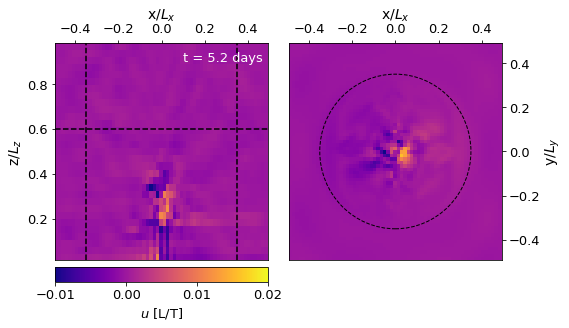

In [45]:
n = 250
maxx = 2e-2
minn = -1e-2
Lz = 2000
nz = exp.params['nz']
new_nz = int(nz*z_lim)

plt.rcParams.update({'font.size': 13})
fig, (ax1, ax2) = plt.subplots(ncols=2, 
                             gridspec_kw = {'width_ratios':[1, 1], 'wspace': 0.1})
fig.set_size_inches(8,4)

im1 = ax1.pcolormesh(XZ, ZX, u[n, :, 32, :]/exp.params['Lz'], cmap='plasma',
                     vmin=minn, vmax=maxx)
ax1.axhline(z_lim, c='k',linestyle='--')
ax1.axvline(r_lim, c='k', linestyle='--')
ax1.axvline(-r_lim, c='k', linestyle='--')
ax1.set_xlabel('x/$L_x$', fontsize=14)
ax1.set_ylabel('z/$L_z$', fontsize=14)
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.text(0.1, 0.9, f't = {time[n]:0.1f} days', color='w')

ax2.pcolormesh(XY, YX, u[new_nz, 8, :, :]/exp.params['Lz'], cmap='plasma', vmin=minn, vmax=maxx)
draw_circle = plt.Circle((0., 0.), r_lim, fill=False, linestyle='--')
ax2.add_artist(draw_circle)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_xlabel('x/$L_x$', fontsize=14) #'$\mathscr{P}$'
ax2.set_ylabel('y/$L_y$', fontsize=14)
ax2.xaxis.set_label_position('top')
ax2.xaxis.tick_top()

p0 = ax1.get_position().get_points().flatten()
p2 = ax2.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.05, p0[2] - p0[0], 0.05])
#ax_cbar = fig.add_axes([p0[0], 0.05, p2[2] - p2[1], 0.05])
cbar = plt.colorbar(im1, cax=ax_cbar, orientation='horizontal')
cbar.set_label('$u$ [L/T]')
#plt.tight_layout(True)
#plt.savefig('../../stage_M2/LES/figs/u_snapshot', facecolor=(1,0,0,0), bbox_inches='tight', dpi=120)